<a href="https://colab.research.google.com/github/maria0000000/Control/blob/main/Lab_sistemas_interactuantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

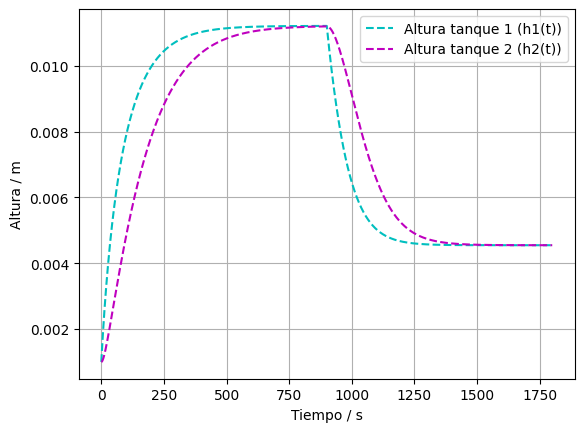

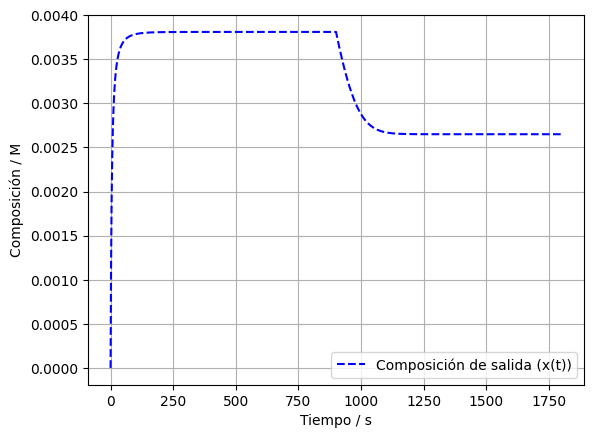

[0.01110081 0.00381032 0.01065327]


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

tpaso = 15 * 60 #s
tfinal = 30 * 60 #s
entrada1 = ((145.3)/60)/1000000 #m^3/s
entrada2 = ((64.35)/60)/1000000  #m^3/s
den = 1000 #kg/m^3
sg = 1
g = 9.81 #m^2/s
PM = 0.05844 #kg/mol
x1 = 0.1 * PM #M
x2 = 0 * PM #M
q2 = ((77.55)/60)/1000000  #m^3/s
D1 = 0.15 #m
D2 = 0.15 #m
Dh1 = 0.0254/8 #m
Dh2 = 0.0254/8 #m
AT1 = (np.pi * np.power(D1, 2))/4
AT2 = (np.pi * np.power(D2, 2))/4
Ah1 = (np.pi * np.power(Dh1, 2))/4
Ah2 = (np.pi * np.power(Dh2, 2))/4


# function that returns dz/dt
def model(z,t):
  h1 = z[0]
  x = z[1]
  h2 = z[2]
  if t < tpaso:
    q1 = entrada1
  else:
    q1 = entrada2
  q3 = Ah1 * np.sqrt(2 * g * h1)
  q4 = Ah2 * np.sqrt(2 * g * h2)
  dh1dt = (q1 + q2 - q3)/AT1
  dxdt = ((x1 * q1) + (x2 * q2) - (x * q3) - (x * q1) - (x * q2) + (x * q3))/(AT1 * h1)
  dh2dt = (q3 - q4)/AT2
  dzdt = [dh1dt, dxdt, dh2dt]
  return dzdt

# initial condition
z0 = [0.001, 0, 0.001]

# time points
t = np.linspace(0, tfinal, 2 * tfinal + 1, 100)

# solve ODE
z = odeint(model, z0, t)

# plot results
plt.plot(t, z[:,0], 'c--', label = 'Altura tanque 1 (h1(t))')
plt.plot(t, z[:,2], 'm--', label = 'Altura tanque 2 (h2(t))')
#plt.plot([0, tpaso, tpaso, tfinal], [entrada1, entrada1, entrada2, entrada2], 'g-', label = 'q1')
plt.ylabel('Altura / m')
plt.xlabel('Tiempo / s')
plt.legend(loc = 'best')
plt.grid()
plt.show()
plt.plot(t, z[:,1], 'b--', label = 'Composición de salida (x(t))')
plt.ylabel('Composición / M')
plt.xlabel('Tiempo / s')
plt.legend(loc = 'best')
plt.grid()
plt.show()
print(z[tpaso - 1])

In [ ]:
import pandas as pd

# Especifica la ruta de tu archivo Excel
archivo_excel = 'C:\Users\Admin\Downloads\Calibración lab - Bombas peristálticas.xlsx'

# Especifica el nombre de la hoja de Excel de la que deseas obtener la tabla
nombre_hoja = 'Bomba1'

# Carga el archivo Excel y la hoja especificada
df = pd.read_excel(archivo_excel, sheet_name=nombre_hoja)

# Muestra la tabla en la consola
print(df)

'''curva_calibración = df.groupby('Esperado')['Experimental'].sum()
import matplotlib.pyplot as plt
curva_calibración.plot(kind='bar')
plt.xlabel('Experado')
plt.ylabel('Experimental')
plt.title('Bomba 1')
plt.show()
'''

SyntaxError: ignored